## 4. Model Evaluation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
df = pd.read_csv('/Users/manjunathreddy/Desktop/mlproject3/notebook/data/cleaned_df.csv')

In [16]:
df.head()

,Unnamed: 0,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,0,81,M,R,E,16.1,337.0,9.5,80.0,False,Yes
1,1,65,M,R,E,9.0,149.0,13.7,112.0,False,No
2,2,53,M,U,E,14.7,329.0,10.6,187.0,False,Yes
3,3,67,F,U,E,9.9,286.0,12.8,130.0,False,No
4,4,60,F,U,E,9.1,26.0,13.6,144.0,False,No


In [8]:
df.shape

(11477, 11)

In [17]:
df = df.drop(df.columns[[0]], axis=1)

In [18]:
df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,M,R,E,16.1,337.0,9.5,80.0,False,Yes
1,65,M,R,E,9.0,149.0,13.7,112.0,False,No
2,53,M,U,E,14.7,329.0,10.6,187.0,False,Yes
3,67,F,U,E,9.9,286.0,12.8,130.0,False,No
4,60,F,U,E,9.1,26.0,13.6,144.0,False,No


In [19]:
df.duplicated().sum()

17

In [20]:
df.isna().sum()

age                    0
gender                 0
locality               0
type_of_admission      0
tl_count               0
platelet_count         0
hb_count               0
glucose                0
alypical_chest_pain    0
assistance_needed      0
dtype: int64

In [21]:
df.dtypes

age                      int64
gender                  object
locality                object
type_of_admission       object
tl_count               float64
platelet_count         float64
hb_count               float64
glucose                float64
alypical_chest_pain       bool
assistance_needed       object
dtype: object

In [22]:
df['hb_count'] = pd.to_numeric(df['hb_count'],errors='coerce')
df['tl_count'] = pd.to_numeric(df['tl_count'],errors='coerce')
df['glucose'] = pd.to_numeric(df['glucose'],errors='coerce')
df['platelet_count'] = pd.to_numeric(df['platelet_count'],errors='coerce')

In [23]:
df['alypical_chest_pain'] = df['alypical_chest_pain'].astype(bool)

In [24]:
df.isna().sum()

age                    0
gender                 0
locality               0
type_of_admission      0
tl_count               0
platelet_count         0
hb_count               0
glucose                0
alypical_chest_pain    0
assistance_needed      0
dtype: int64

In [25]:
df.nunique()

age                     65
gender                   2
locality                 2
type_of_admission        2
tl_count               229
platelet_count         456
hb_count               140
glucose                306
alypical_chest_pain      2
assistance_needed        2
dtype: int64

In [26]:
numeric_columns = df.select_dtypes(include=['number'])

In [27]:
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
threshold_multiplier = 1.5

In [28]:
IQR = Q3-Q1

In [29]:
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

In [30]:
outliers = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)

In [31]:
cleaned_df = df[~outliers]

In [32]:
cleaned_df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,M,R,E,16.1,337.0,9.5,80.0,False,Yes
1,65,M,R,E,9.0,149.0,13.7,112.0,False,No
2,53,M,U,E,14.7,329.0,10.6,187.0,False,Yes
3,67,F,U,E,9.9,286.0,12.8,130.0,False,No
4,60,F,U,E,9.1,26.0,13.6,144.0,False,No


### 4.1 Standardization of Dataset

In [33]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
cat_transform = OrdinalEncoder()

In [34]:
numeric_features = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

In [35]:
categorical_features = cleaned_df.select_dtypes(include=['object','bool']).columns

In [36]:
numeric_features

Index(['age', 'tl_count', 'platelet_count', 'hb_count', 'glucose'], dtype='object')

In [37]:
categorical_features

Index(['gender', 'locality', 'type_of_admission', 'alypical_chest_pain',
       'assistance_needed'],
      dtype='object')

In [38]:
cleaned_df[categorical_features] = cat_transform.fit_transform(cleaned_df[categorical_features])

/var/folders/pn/7648xrwx1vv3z18g2n8dmck80000gn/T/ipykernel_76479/2770928765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[categorical_features] = cat_transform.fit_transform(cleaned_df[categorical_features])


- We have transformed our data into the standard form
#### Categorical Features  
- gender(M/F) = gender(1.0/0.0)
- locality(R/U) = locality(0.0/1.0),
- type_of_admission(E/O) = type_of_admission(0.0/1.0)
- alypical_chest_pain(False/True) = alypical_chest_pain(0.0/1.0)


In [39]:
cleaned_df.isnull().sum()

age                    0
gender                 0
locality               0
type_of_admission      0
tl_count               0
platelet_count         0
hb_count               0
glucose                0
alypical_chest_pain    0
assistance_needed      0
dtype: int64

### 4.2 Spliting of the Data 

In [40]:
cleaned_df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,1.0,0.0,0.0,16.1,337.0,9.5,80.0,0.0,1.0
1,65,1.0,0.0,0.0,9.0,149.0,13.7,112.0,0.0,0.0
2,53,1.0,1.0,0.0,14.7,329.0,10.6,187.0,0.0,1.0
3,67,0.0,1.0,0.0,9.9,286.0,12.8,130.0,0.0,0.0
4,60,0.0,1.0,0.0,9.1,26.0,13.6,144.0,0.0,0.0


In [41]:
cleaned_df["assistance_needed"]=cleaned_df["assistance_needed"].astype(bool)

/var/folders/pn/7648xrwx1vv3z18g2n8dmck80000gn/T/ipykernel_76479/70889764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["assistance_needed"]=cleaned_df["assistance_needed"].astype(bool)


In [42]:
print("Categories in 'assistance_needed' variable:     ",end=" " )
print(cleaned_df["assistance_needed"].unique())

Categories in 'assistance_needed' variable:      [ True False]


In [43]:
cleaned_df.head()

,age,gender,locality,type_of_admission,tl_count,platelet_count,hb_count,glucose,alypical_chest_pain,assistance_needed
0,81,1.0,0.0,0.0,16.1,337.0,9.5,80.0,0.0,True
1,65,1.0,0.0,0.0,9.0,149.0,13.7,112.0,0.0,False
2,53,1.0,1.0,0.0,14.7,329.0,10.6,187.0,0.0,True
3,67,0.0,1.0,0.0,9.9,286.0,12.8,130.0,0.0,False
4,60,0.0,1.0,0.0,9.1,26.0,13.6,144.0,0.0,False


In [44]:
cleaned_df.dtypes

age                      int64
gender                 float64
locality               float64
type_of_admission      float64
tl_count               float64
platelet_count         float64
hb_count               float64
glucose                float64
alypical_chest_pain    float64
assistance_needed         bool
dtype: object

In [45]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('assistance_needed',axis=1)
y = cleaned_df['assistance_needed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

In [49]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    # Train
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    results.append((name, train_accuracy, test_accuracy, train_f1, test_f1))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1'])

print(results_df)


                 Model  Train Accuracy  Test Accuracy  Train F1   Test F1
0  Logistic Regression        0.999198       0.997251  0.998976  0.996571
1        Decision Tree        1.000000       1.000000  1.000000  1.000000
2        Random Forest        0.999771       0.998168  0.999708  0.997717
3                  SVM        0.999313       0.997710  0.999123  0.997144
4                  KNN        0.801283       0.677050  0.722711  0.547787


In [50]:
final_model = LogisticRegression(max_iter=1000)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.73


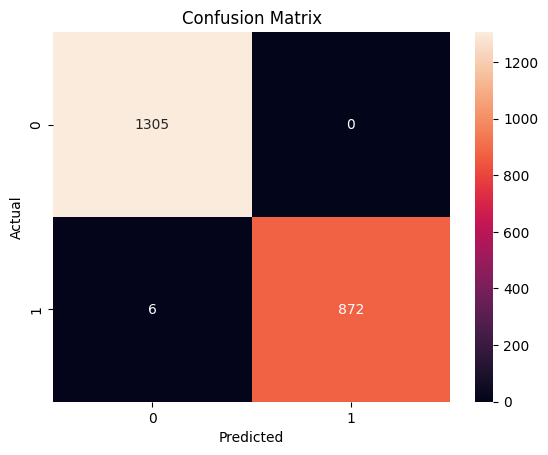

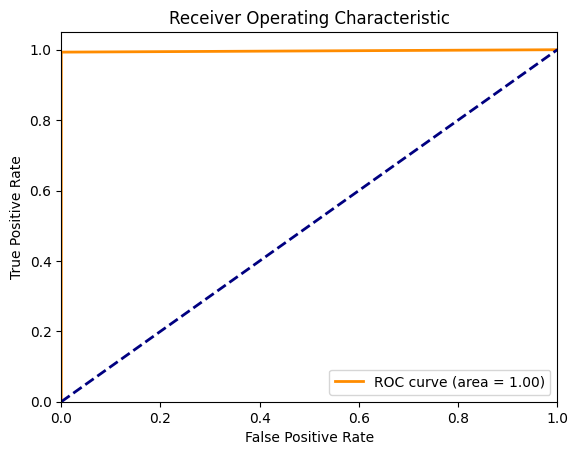

In [51]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()